# Data modelling for X Company

## Step 1: Reading and understanding the data

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
Leadscore_df=pd.read_csv(r"C:\Users\amanr\Downloads\Logistic Regression\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

In [6]:
# Check the head of the dataset
Leadscore_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
Leadscore_df.shape

(9240, 37)

In [8]:
Leadscore_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
Leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 2: Data Preparation

##### Converting some binary variables to 0 and 1

In [10]:
# identifying binary variables -
print(Leadscore_df['Do Not Email'].value_counts())
print(Leadscore_df['Do Not Call'].value_counts())
print(Leadscore_df['Search'].value_counts())
print(Leadscore_df['Magazine'].value_counts())
print(Leadscore_df['Newspaper Article'].value_counts())
print(Leadscore_df['X Education Forums'].value_counts())
print(Leadscore_df['Newspaper'].value_counts())
print(Leadscore_df['Digital Advertisement'].value_counts())
print(Leadscore_df['Through Recommendations'].value_counts())
print(Leadscore_df['Receive More Updates About Our Courses'].value_counts())
print(Leadscore_df['Update me on Supply Chain Content'].value_counts())
print(Leadscore_df['Get updates on DM Content'].value_counts())
print(Leadscore_df['I agree to pay the amount through cheque'].value_counts())
print(Leadscore_df['A free copy of Mastering The Interview'].value_counts())


No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No    9240
Name: Magazine, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [11]:
# converting binary values to 0 and 1 
# list of variables to map
varlist= ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article',
          'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
          'Receive More Updates About Our Courses','Update me on Supply Chain Content',
          'Get updates on DM Content','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview']

# Defining the map fuction
def binary_map(x):
    return x.map({'Yes':1,'No':0})

# Applying the function to the leadscore list
Leadscore_df[varlist]= Leadscore_df[varlist].apply(binary_map)



In [12]:
Leadscore_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [13]:
Leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [14]:
#identifying list of categorical variables and their respective levels in %

print(round(Leadscore_df['Lead Origin'].value_counts(normalize=True),2))
print(round(Leadscore_df['Lead Source'].value_counts(normalize=True),2))
print(round(Leadscore_df['Last Activity'].value_counts(normalize=True),2))
print(round(Leadscore_df['Country'].value_counts(normalize=True),2))
print(round(Leadscore_df['Specialization'].value_counts(normalize=True),2))
print(round(Leadscore_df['How did you hear about X Education'].value_counts(normalize=True),2))
print(round(Leadscore_df['What is your current occupation'].value_counts(normalize=True),2))
print(round(Leadscore_df['What matters most to you in choosing a course'].value_counts(normalize=True),2))
print(round(Leadscore_df['Tags'].value_counts(normalize=True),2))
print(round(Leadscore_df['Lead Quality'].value_counts(normalize=True),2))
print(round(Leadscore_df['Lead Profile'].value_counts(normalize=True),2))
print(round(Leadscore_df['City'].value_counts(normalize=True),2))
print(round(Leadscore_df['Asymmetrique Activity Index'].value_counts(normalize=True),2))
print(round(Leadscore_df['Asymmetrique Profile Index'].value_counts(normalize=True),2))
print(round(Leadscore_df['Last Notable Activity'].value_counts(normalize=True),2))

Landing Page Submission    0.53
API                        0.39
Lead Add Form              0.08
Lead Import                0.01
Quick Add Form             0.00
Name: Lead Origin, dtype: float64
Google               0.31
Direct Traffic       0.28
Olark Chat           0.19
Organic Search       0.13
Reference            0.06
Welingak Website     0.02
Referral Sites       0.01
Facebook             0.01
bing                 0.00
google               0.00
Click2call           0.00
Press_Release        0.00
Live Chat            0.00
Social Media         0.00
blog                 0.00
welearnblog_Home     0.00
NC_EDM               0.00
Pay per Click Ads    0.00
youtubechannel       0.00
testone              0.00
WeLearn              0.00
Name: Lead Source, dtype: float64
Email Opened                    0.38
SMS Sent                        0.30
Olark Chat Conversation         0.11
Page Visited on Website         0.07
Converted to Lead               0.05
Email Bounced                   0.04
Emai

#### since % of 'Select' values is quite high, we'll remove these after converting them into dummy values

In [15]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(Leadscore_df['Lead Origin'], prefix='Lead Origin')
# Dropping Lead Origin_Quick Add Form column
lo1 = lo.drop(['Lead Origin_Quick Add Form'], 1)
#Adding the results to the master dataframe
Leadscore_df = pd.concat([Leadscore_df,lo1], axis=1)


# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(Leadscore_df['Lead Source'], prefix='Lead Source')
# Dropping Lead Source_Click2call column
ls1 = ls.drop(['Lead Source_Click2call'], 1)
#Adding the results to the master dataframe
Leadscore_df = pd.concat([Leadscore_df,ls1], axis=1)


# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(Leadscore_df['Last Activity'], prefix='Last Activity')
# Dropping Last Activity_Approached upfront column
la1 = la.drop(['Last Activity_Approached upfront'], 1)
#Adding the results to the master dataframe
Leadscore_df = pd.concat([Leadscore_df,la1], axis=1)

# Creating dummy variables for the variable 'Country'
cntry = pd.get_dummies(Leadscore_df['Country'], prefix='Country')
# Dropping Country_Asia/Pacific Region column
cntry1 = cntry.drop(['Country_Asia/Pacific Region'], 1)
#Adding the results to the master dataframe
Leadscore_df = pd.concat([Leadscore_df,cntry1], axis=1)

# Creating dummy variables for the variable 'Specialization'
spl = pd.get_dummies(Leadscore_df['Specialization'], prefix='Specialization')
spl
# Dropping Specialization_Services Excellence column
spl1 = spl.drop(['Specialization_Services Excellence'], 1)
#Adding the results to the master dataframe
Leadscore_df = pd.concat([Leadscore_df,spl1], axis=1)

# Creating dummy variables for the variable 'How did you hear about X Education'
X = pd.get_dummies(Leadscore_df['How did you hear about X Education'], prefix='How did you hear about X Education')
# Dropping How did you hear about X Education_SMS column
X1 = X.drop(['How did you hear about X Education_SMS'], 1)
#Adding the results to the master dataframe
Leadscore_df = pd.concat([Leadscore_df,X1], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
Oc = pd.get_dummies(Leadscore_df['What is your current occupation'], prefix='What is your current occupation')
# Dropping What is your current occupation_Businessman column
Oc1 = Oc.drop(['What is your current occupation_Businessman'], 1)
#Adding the results to the master dataframe
Leadscore_df = pd.concat([Leadscore_df,Oc1], axis=1)

# Creating dummy variables for the variable 'What matters most to you in choosing a course'
Ch = pd.get_dummies(Leadscore_df['What matters most to you in choosing a course'], prefix='What matters most to you in choosing a course')
# Dropping What matters most to you in choosing a course_Other Prospects column
Ch1 = Ch.drop(['What matters most to you in choosing a course_Other'], 1)
#Adding the results to the master dataframe
Leadscore_df = pd.concat([Leadscore_df,Ch1], axis=1)

# Creating dummy variables for the variable 'Tags'
T = pd.get_dummies(Leadscore_df['Tags'], prefix='Tags')
# Dropping Recognition issue (DEC approval) a student column
T1 = T.drop(['Tags_Recognition issue (DEC approval)'], 1)
#Adding the results to the master dataframe
Leadscore_df = pd.concat([Leadscore_df,T1], axis=1)


# Creating dummy variables for the variable 'Lead Quality'
Lq = pd.get_dummies(Leadscore_df['Lead Quality'], prefix='Lead Quality')
# Dropping Lead Quality_Low in Relevance column
Lq1 = Lq.drop(['Lead Quality_Low in Relevance'], 1)
#Adding the results to the master dataframe
Leadscore_df = pd.concat([Leadscore_df,Lq1], axis=1)


# Creating dummy variables for the variable 'Lead Profile'
Lp = pd.get_dummies(Leadscore_df['Lead Profile'], prefix='Lead Profile')
# Dropping Lead Profile_Dual Specialization Student column
Lp1 = Lp.drop(['Lead Profile_Dual Specialization Student'], 1)
#Adding the results to the master dataframe
Leadscore_df = pd.concat([Leadscore_df,Lp1], axis=1)


# Creating dummy variables for the variable 'City'
Cy = pd.get_dummies(Leadscore_df['City'], prefix='City')
# Dropping City_Tier II Cities column
Cy1 = Cy.drop(['City_Tier II Cities'], 1)
#Adding the results to the master dataframe
Leadscore_df = pd.concat([Leadscore_df,Cy1], axis=1)


# Creating dummy variables for the variable 'Asymmetrique Activity Index'
AAI = pd.get_dummies(Leadscore_df['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index')
# Dropping Asymmetrique Activity Index_03.Low column
AAI1 = AAI.drop(['Asymmetrique Activity Index_03.Low'], 1)
#Adding the results to the master dataframe
Leadscore_df = pd.concat([Leadscore_df,AAI1], axis=1)

# Creating dummy variables for the variable 'Asymmetrique Profile Index'
API = pd.get_dummies(Leadscore_df['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
# Dropping Asymmetrique Activity Index_03.Low column
API1 = API.drop(['Asymmetrique Profile Index_03.Low'], 1)
#Adding the results to the master dataframe
Leadscore_df = pd.concat([Leadscore_df,API1], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'
Ln = pd.get_dummies(Leadscore_df['Last Notable Activity'], prefix='Last Notable Activity')
# Dropping Last Notable Activity_Approached upfront column
Ln1 = Ln.drop(['Last Notable Activity_Approached upfront'], 1)
#Adding the results to the master dataframe
Leadscore_df = pd.concat([Leadscore_df,Ln1], axis=1)



In [16]:
Leadscore_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


##### Dropping the repeated variables

In [17]:
# we have created dummies for the below variables so we can drop them
Leadscore_df= Leadscore_df.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Last Notable Activity'],1)

In [18]:
Leadscore_df.shape

(9240, 192)

In [19]:
Leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 192 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: float64(4), int64(17), object(1), uint8(170)
memory usage: 3.0+ MB


#### Checking for outliers

In [20]:
# Checking for outliers in continous variables
num_Leadscore=Leadscore_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']]

In [21]:
# Checking for ouliers at 5%, 25%, 50%, 75%, 90%, 95% and 99%
num_Leadscore.describe(percentiles=[.1,.25,.5,.75,.9,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,3.445238,487.698268,2.362820,14.306252,16.344883
std,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,7.000000,11.000000
10%,0.000000,0.000000,0.000000,13.000000,15.000000
25%,1.000000,12.000000,1.000000,14.000000,15.000000
50%,3.000000,248.000000,2.000000,14.000000,16.000000
75%,5.000000,936.000000,3.000000,15.000000,18.000000
90%,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,10.000000,1562.000000,6.000000,17.000000,20.000000


In [22]:
# removing statistical outliers for Total Visits
Q1= Leadscore_df.TotalVisits.quantile(0.25)
Q3= Leadscore_df.TotalVisits.quantile(0.99)
IQR = Q3-Q1
Leadscore_df= Leadscore_df[(Leadscore_df.TotalVisits>= Q1-1.5*IQR) & (Leadscore_df.TotalVisits<= Q3+1.5*IQR)]

In [23]:
Leadscore_df.TotalVisits.describe(percentiles=[.1,.25,.5,.75,.9,.95,.99])

count    9095.000000
mean        3.363057
std         3.455348
min         0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        16.060000
max        41.000000
Name: TotalVisits, dtype: float64

#### Check for missing values and imputing them

In [24]:
# adding up the missing values (column-wise)
nulls = Leadscore_df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])


Prospect ID 0
Lead Number 0
Do Not Email 0
Do Not Call 0
Converted 0
TotalVisits 0
Total Time Spent on Website 0
Page Views Per Visit 0
Search 0
Magazine 0
Newspaper Article 0
X Education Forums 0
Newspaper 0
Digital Advertisement 0
Through Recommendations 0
Receive More Updates About Our Courses 0
Update me on Supply Chain Content 0
Get updates on DM Content 0
Asymmetrique Activity Score 4164
Asymmetrique Profile Score 4164
I agree to pay the amount through cheque 0
A free copy of Mastering The Interview 0
Lead Origin_API 0
Lead Origin_Landing Page Submission 0
Lead Origin_Lead Add Form 0
Lead Origin_Lead Import 0
Lead Source_Direct Traffic 0
Lead Source_Facebook 0
Lead Source_Google 0
Lead Source_Live Chat 0
Lead Source_NC_EDM 0
Lead Source_Olark Chat 0
Lead Source_Organic Search 0
Lead Source_Pay per Click Ads 0
Lead Source_Press_Release 0
Lead Source_Reference 0
Lead Source_Referral Sites 0
Lead Source_Social Media 0
Lead Source_WeLearn 0
Lead Source_Welingak Website 0
Lead Source_

In [25]:
# checking the percentage of missing values for Asymmetrique Activity Score and Asymmetrique Profile Score

print(round(100*(Leadscore_df['Asymmetrique Activity Score'].isnull().sum()/len(Leadscore_df.index)),2))
print(round(100*(Leadscore_df['Asymmetrique Profile Score'].isnull().sum()/len(Leadscore_df.index)),2))

45.78
45.78


In [26]:
# Now lets drop all the columns having missing values more than 30% that is 2 columns
Leadscore_df= Leadscore_df.drop(['Asymmetrique Activity Score','Asymmetrique Profile Score'],1)

In [27]:
# rechecking missing values (column-wise)
nulls = Leadscore_df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

Prospect ID 0
Lead Number 0
Do Not Email 0
Do Not Call 0
Converted 0
TotalVisits 0
Total Time Spent on Website 0
Page Views Per Visit 0
Search 0
Magazine 0
Newspaper Article 0
X Education Forums 0
Newspaper 0
Digital Advertisement 0
Through Recommendations 0
Receive More Updates About Our Courses 0
Update me on Supply Chain Content 0
Get updates on DM Content 0
I agree to pay the amount through cheque 0
A free copy of Mastering The Interview 0
Lead Origin_API 0
Lead Origin_Landing Page Submission 0
Lead Origin_Lead Add Form 0
Lead Origin_Lead Import 0
Lead Source_Direct Traffic 0
Lead Source_Facebook 0
Lead Source_Google 0
Lead Source_Live Chat 0
Lead Source_NC_EDM 0
Lead Source_Olark Chat 0
Lead Source_Organic Search 0
Lead Source_Pay per Click Ads 0
Lead Source_Press_Release 0
Lead Source_Reference 0
Lead Source_Referral Sites 0
Lead Source_Social Media 0
Lead Source_WeLearn 0
Lead Source_Welingak Website 0
Lead Source_bing 0
Lead Source_blog 0
Lead Source_google 0
Lead Source_teston

In [28]:
# remove 'select' columns as they are as good as null values
Leadscore_df= Leadscore_df.drop(['Specialization_Select','How did you hear about X Education_Select','Lead Profile_Select','City_Select'],1)

## Step 4: Test train split

In [29]:
import sklearn
from sklearn.model_selection import train_test_split

In [30]:
#putting feature variable int X
X= Leadscore_df.drop(['Prospect ID', 'Lead Number','Converted'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
#putting response variable into y
y= Leadscore_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [32]:
#Splitting the data into train and test

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler= StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3069,0,0,-0.949905,-0.876219,-1.108557,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1963,0,0,-0.381462,-0.396960,-0.154178,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1567,0,0,-0.949905,-0.876219,-1.108557,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7059,0,0,1.323867,0.885331,2.708958,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6861,0,0,-0.949905,-0.876219,-1.108557,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#checking the conversion rate for class imbalance

Converted=(sum(Leadscore_df['Converted'])/len(Leadscore_df['Converted'].index))*100
Converted

38.04288070368334

##### we have almost 38% conversion rate - which ensures that there is no class imbalance

## Step 6: Model Building

##### Running your first training model

In [36]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6366
Model:                            GLM   Df Residuals:                     6204
Model Family:                Binomial   Df Model:                          161
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 15 Dec 2021   Deviance:                       33526.
Time:                        10:32:35   Pearson chi2:                 1.64e+18
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -1.114e+27   1.21e+20  -9.23e+06      0.000   -1.11e+27   -1.11e+27
Do Not Email                                                            -5.035e+14   5.26e+06  -9.56e+07      0.000   -5.04e+14   -5.04e+14
Do Not Call                                                              2.755e+15   4.84e+07   5.69e+07      0.000    2.75e+15    2.75e+15
TotalVisits                                                              7.945e+13   1.31e+06   6.07e+07      0.000    7.95e+13    7.95e+13
Total Time Spent on Website                                              3.661e+14   1.06e+06   3.47e+08      0.000    3.66e+14    3.66e+14
Page Views Per Visit                                                    -2.392e+12   1.41e+06   -1.7e+06      0.000   -2.39e+12   -2.39e+12
Search                                                                   7.821e+14   2.83e+07   2.76e+07      0.000    7.82e+14    7.82e+14
Magazine                                                                -3.645e+24    4.7e+17  -7.75e+06      0.000   -3.65e+24   -3.65e+24
Newspaper Article                                                       -1.179e+25   1.23e+18   -9.6e+06      0.000   -1.18e+25   -1.18e+25
X Education Forums                                                       1.179e+25   1.23e+18    9.6e+06      0.000    1.18e+25    1.18e+25
Newspaper                                                               -3.233e+15   6.77e+07  -4.78e+07      0.000   -3.23e+15   -3.23e+15
Digital Advertisement                                                    3.502e+14   3.94e+07   8.89e+06      0.000     3.5e+14     3.5e+14
Through Recommendations                                                  1.197e+15   3.47e+07   3.45e+07      0.000     1.2e+15     1.2e+15
Receive More Updates About Our Courses                                   5.972e+24   6.59e+17   9.06e+06      0.000    5.97e+24    5.97e+24
Update me on Supply Chain Content                                        5.266e+24   5.45e+17   9.67e+06      0.000    5.27e+24    5.27e+24
Get updates on DM Content                                               -1.364e+25   1.75e+18  -7.77e+06      0.000   -1.36e+25   -1.36e+25
I agree to pay the amount through cheque                                 5.001e+24   6.15e+17   8.14e+06      0.000       5e+24       5e+24
A free copy of Mastering The Interview                                   1.494e+14   3.53e+06   4.24e+07      0.000    1.49e+14    1.49e+14
Lead Origin_API                                                          4.845e+26   7.67e+19   6.32e+06      0.000    4.84e+26    4.84e+26
Lea

## Step 7: Feature selection using RFE

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [38]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 60)             # running RFE with 60 variables as output - as we want to be conservative
rfe = rfe.fit(X_train, y_train)

In [39]:
rfe.support_
# kept 60 variables instead of a lower number - 
# a. this is because when i reduce my rfe to 15 my variable composition becomes biased - eg. It only keeps dummy variables from Tag column
# b. my earlier model had 183 variables so keep 1/3 rd of it is a conservative approach

array([ True, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True, False, False,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True, False,
        True,  True,

In [40]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 55),
 ('TotalVisits', False, 48),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 91),
 ('Search', True, 1),
 ('Magazine', False, 109),
 ('Newspaper Article', False, 76),
 ('X Education Forums', False, 74),
 ('Newspaper', False, 78),
 ('Digital Advertisement', False, 19),
 ('Through Recommendations', False, 97),
 ('Receive More Updates About Our Courses', False, 116),
 ('Update me on Supply Chain Content', False, 115),
 ('Get updates on DM Content', False, 119),
 ('I agree to pay the amount through cheque', False, 122),
 ('A free copy of Mastering The Interview', False, 58),
 ('Lead Origin_API', False, 50),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 79),
 ('Lead Source_Direct Traffic', False, 27),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Live Chat', False, 99),
 ('Lead Source_NC

In [41]:
col = X_train.columns[rfe.support_]

In [42]:
X_train.columns[~rfe.support_] # list of columns that have been excluded

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       ...
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=123)

In [43]:
X_train_1=X_train[col]
X_train_1

,Do Not Email,Total Time Spent on Website,Search,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_NC_EDM,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,...,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
3069,0,-0.876219,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1963,0,-0.396960,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1567,0,-0.876219,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
7059,0,0.885331,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6861,0,-0.876219,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,0.603630,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
82,0,-0.876219,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
8180,0,-0.876219,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
7062,0,-0.349400,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Step 8: Data modelling

#### Assesing the model with Statsmodel

In [44]:
X_train_sm = sm.add_constant(X_train_1)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6366
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1000.7
Date:                Wed, 15 Dec 2021   Deviance:                       2001.4
Time:                        10:33:08   Pearson chi2:                 8.22e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.5606      0.181     -8.610      0.000      -1.916      -1.205
Do Not Email                                                             -1.5529      0.297     -5.229      0.000      -2.135      -0.971
Total Time Spent on Website                                               1.1028      0.070     15.741      0.000       0.965       1.240
Search                                                                    1.9533      1.302      1.501      0.133      -0.598       4.505
Lead Origin_Landing Page Submission                                      -0.3413      0.167     -2.040      0.041      -0.669      -0.013
Lead Origin_Lead Add Form                                                 0.5887      0.968      0.608      0.543      -1.309       2.486
Lead Source_Facebook                                                     -0.9079      0.842     -1.079      0.281      -2.558       0.742
Lead Source_NC_EDM                                                       26.5020   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Reference                                                    -0.5166      1.060     -0.488      0.626      -2.594       1.560
Lead Source_Welingak Website                                              2.6592      1.402      1.897      0.058      -0.088       5.407
Last Activity_Converted to Lead                                          -0.7113      0.404     -1.759      0.078      -1.504       0.081
Last Activity_Olark Chat Conversation                                    -0.9411      0.342     -2.752      0.006      -1.611      -0.271
Last Activity_SMS Sent                                                    1.1943      0.275      4.339      0.000       0.655       1.734
Last Activity_Unsubscribed                                                1.9950      1.033      1.930      0.054      -0.030       4.021
Country_France                                                           -1.9433      1.669     -1.164      0.244      -5.214       1.327
Country_India                                                            -0.9671      0.179     -5.394      0.000      -1.318      -0.616
Country_Qatar                                                           -26.7636   6.15e+04     -0.000      1.000   -1.21e+05    1.21e+05
Country_Saudi Arabia                                                     -3.4763      1.738     -2.000      0.046      -6.884      -0.069
Country_South Africa                                                      2.3857      1.946      1.226      0.220      -1.427       6.199
Country_unknown                                

In [45]:
# will remove multiple columns, where p value is greater than 0.05 -

X = X_train_1.drop(['Last Notable Activity_Had a Phone Conversation',
    'Last Notable Activity_Email Link Clicked',
    'Lead Profile_Student of SomeSchool',
    'Lead Quality_Worst',
    'Lead Quality_High in Relevance',
    'Tags_wrong number given',
    'Tags_number not provided',
    'Tags_in touch with EINS',
    'Tags_Lost to Others',
    'Tags_Lateral student',
    'Tags_In confusion whether part time or DLP',
    'What is your current occupation_Working Professional',
                    'What is your current occupation_Housewife',
                    'How did you hear about X Education_Advertisements',
                    'Country_unknown','Country_South Africa','Country_Qatar','Country_France',
                    'Last Activity_Converted to Lead','Lead Source_NC_EDM','Lead Source_Reference',
                    'Lead Source_Facebook','Search','Lead Origin_Lead Add Form','Tags_Diploma holder (Not Eligible)','Tags_wrong number given'],axis=1)

In [46]:
#re-run the model and check statistics
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6366
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1088.2
Date:                Wed, 15 Dec 2021   Deviance:                       2176.5
Time:                        10:33:08   Pearson chi2:                 8.25e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.4096      0.165     -8.530      0.000      -1.733      -1.086
Do Not Email                                                             -1.4639      0.283     -5.165      0.000      -2.019      -0.908
Total Time Spent on Website                                               1.1089      0.067     16.622      0.000       0.978       1.240
Lead Origin_Landing Page Submission                                      -0.6143      0.156     -3.943      0.000      -0.920      -0.309
Lead Source_Welingak Website                                              3.7786      1.033      3.658      0.000       1.754       5.803
Last Activity_Olark Chat Conversation                                    -0.7685      0.326     -2.356      0.018      -1.408      -0.129
Last Activity_SMS Sent                                                    1.3896      0.254      5.463      0.000       0.891       1.888
Last Activity_Unsubscribed                                                2.0488      0.957      2.140      0.032       0.172       3.925
Country_India                                                            -0.9173      0.164     -5.583      0.000      -1.239      -0.595
Country_Saudi Arabia                                                     -3.7691      1.201     -3.137      0.002      -6.124      -1.414
How did you hear about X Education_Student of SomeSchool                  0.6306      0.296      2.134      0.033       0.051       1.210
What matters most to you in choosing a course_Better Career Prospects     2.0317      0.150     13.554      0.000       1.738       2.325
Tags_Already a student                                                   -5.0003      0.740     -6.754      0.000      -6.451      -3.549
Tags_Busy                                                                -0.6606      0.271     -2.439      0.015      -1.191      -0.130
Tags_Closed by Horizzon                                                   4.8649      0.737      6.605      0.000       3.421       6.309
Tags_Graduation in progress                                              -1.8905      0.561     -3.371      0.001      -2.990      -0.791
Tags_Interested  in full time MBA                                        -3.5375      0.761     -4.648      0.000      -5.029      -2.046
Tags_Interested in other courses                                         -3.9000      0.457     -8.525      0.000      -4.797      -3.003
Tags_Lost to EINS                                                         5.6999      0.676      8.434      0.000       4.375       7.024
Tags_Not doing further education               

In [47]:
X.shape

(6366, 35)

In [48]:
X= X.drop(['Tags_Still Thinking','Tags_Want to take admission but has financial problems','Lead Profile_Other Leads'],axis=1)
X.shape


(6366, 32)

In [49]:
#re-run the model and check statistics
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6366
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1092.2
Date:                Wed, 15 Dec 2021   Deviance:                       2184.3
Time:                        10:33:08   Pearson chi2:                 8.18e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.3824      0.164     -8.427      0.000      -1.704      -1.061
Do Not Email                                                             -1.4708      0.284     -5.174      0.000      -2.028      -0.914
Total Time Spent on Website                                               1.1052      0.067     16.597      0.000       0.975       1.236
Lead Origin_Landing Page Submission                                      -0.6111      0.155     -3.942      0.000      -0.915      -0.307
Lead Source_Welingak Website                                              3.7964      1.033      3.676      0.000       1.772       5.821
Last Activity_Olark Chat Conversation                                    -0.7836      0.324     -2.416      0.016      -1.419      -0.148
Last Activity_SMS Sent                                                    1.3323      0.254      5.247      0.000       0.835       1.830
Last Activity_Unsubscribed                                                2.0860      0.961      2.171      0.030       0.203       3.969
Country_India                                                            -0.9138      0.164     -5.572      0.000      -1.235      -0.592
Country_Saudi Arabia                                                     -3.6598      1.237     -2.959      0.003      -6.084      -1.236
How did you hear about X Education_Student of SomeSchool                  0.6347      0.295      2.153      0.031       0.057       1.212
What matters most to you in choosing a course_Better Career Prospects     2.0178      0.148     13.619      0.000       1.727       2.308
Tags_Already a student                                                   -4.9617      0.739     -6.717      0.000      -6.409      -3.514
Tags_Busy                                                                -0.5655      0.269     -2.105      0.035      -1.092      -0.039
Tags_Closed by Horizzon                                                   4.9361      0.736      6.709      0.000       3.494       6.378
Tags_Graduation in progress                                              -1.6796      0.551     -3.050      0.002      -2.759      -0.600
Tags_Interested  in full time MBA                                        -3.3487      0.754     -4.441      0.000      -4.826      -1.871
Tags_Interested in other courses                                         -3.7868      0.456     -8.305      0.000      -4.680      -2.893
Tags_Lost to EINS                                                         5.6907      0.673      8.459      0.000       4.372       7.009
Tags_Not doing further education               

In [50]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3069    0.992434
1963    0.052035
1567    0.982650
7059    0.043660
6861    0.087001
6235    0.207356
309     0.916686
6089    0.016391
1050    0.987741
5242    0.328476
dtype: float64

In [51]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99243373, 0.05203461, 0.98265045, 0.04366012, 0.08700149,
       0.20735591, 0.91668593, 0.01639122, 0.98774069, 0.32847607])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [52]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ID
0,1,0.992434,3069
1,0,0.052035,1963
2,1,0.982650,1567
3,0,0.043660,7059
4,0,0.087001,6861


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [53]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted
0,1,0.992434,3069,1
1,0,0.052035,1963,0
2,1,0.982650,1567,1
3,0,0.043660,7059,0
4,0,0.087001,6861,0


In [54]:
from sklearn import metrics

In [55]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3777  148]
 [ 267 2174]]


In [56]:
# Predicted     not_Converted    Converted
# Actual
# not_Converted        3777      148
# Converted            267       2174  

In [57]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9348099277411247


#### Checking VIFs

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.24
27,Asymmetrique Activity Index_02.Medium,6.84
29,Asymmetrique Profile Index_02.Medium,6.27
28,Asymmetrique Profile Index_01.High,5.67
32,Last Notable Activity_SMS Sent,5.42
6,Last Activity_SMS Sent,4.70
26,Asymmetrique Activity Index_01.High,3.25
21,Tags_Will revert after reading the email,3.01
11,What matters most to you in choosing a course_...,2.91
20,Tags_Ringing,2.14


##### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with checking sensitivity and specificity

### Sensitivity and Specificity analysis

In [60]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [61]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8906185989348627

In [62]:
# Let us calculate specificity
TN / float(TN+FP)

0.9622929936305733

In [63]:
# Calculate false postive rate - predicting conversion when customer has not have converted
print(FP/ float(TN+FP))

0.037707006369426754


In [64]:
# positive predictive value 
print (TP / float(TP+FP))

0.9362618432385874


In [65]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9339762611275965


## Step 9: Plotting the ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [66]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [67]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

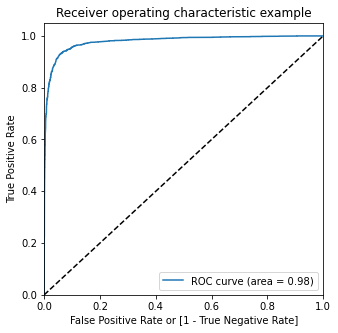

In [68]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Step 10: Finding Optimal cut-off point

In [69]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.992434,3069,1,1,1,1,1,1,1,1,1,1,1
1,0,0.052035,1963,0,1,0,0,0,0,0,0,0,0,0
2,1,0.982650,1567,1,1,1,1,1,1,1,1,1,1,1
3,0,0.043660,7059,0,1,0,0,0,0,0,0,0,0,0
4,0,0.087001,6861,0,1,0,0,0,0,0,0,0,0,0


In [70]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383443  1.000000  0.000000
0.1   0.1  0.880773  0.975420  0.821911
0.2   0.2  0.922086  0.957395  0.900127
0.3   0.3  0.931982  0.941827  0.925860
0.4   0.4  0.938266  0.926669  0.945478
0.5   0.5  0.934810  0.890619  0.962293
0.6   0.6  0.932297  0.870955  0.970446
0.7   0.7  0.926170  0.845555  0.976306
0.8   0.8  0.919416  0.819336  0.981656
0.9   0.9  0.898995  0.752560  0.990064


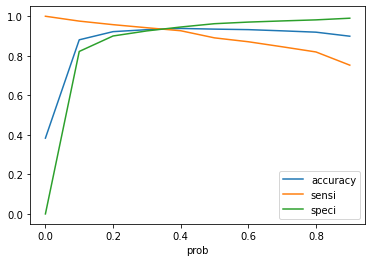

In [71]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [72]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.992434,3069,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.052035,1963,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.982650,1567,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.043660,7059,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.087001,6861,0,1,0,0,0,0,0,0,0,0,0,0


In [73]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9354382657869934

In [74]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3675,  250],
       [ 161, 2280]], dtype=int64)

In [75]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [76]:
# Let's see the sensitivity of our logistic regression model
TP2 / float(TP2+FN2)

0.934043424825891

In [77]:
# Let us calculate specificity
TN2 / float(TN2+FP2)

0.9363057324840764

In [78]:
# Calculate false postive rate - predicting converted when customer has not converted
print(FP2/ float(TN2+FP2))

0.06369426751592357


In [79]:
# Positive predictive value 
print (TP2 / float(TP2+FP2))

0.9011857707509882


In [80]:
# Negative predictive value
print (TN2 / float(TN2+ FN2))

0.958029197080292


In [81]:
# True Positive rate
print (TP2 / float(TP2+ FN2))

0.934043424825891


### Precision and Recall

In [82]:
#Looking at the confusion matrix again

In [83]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3675,  250],
       [ 161, 2280]], dtype=int64)

##### Precision
TP / TP + FP

In [84]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.9011857707509882

##### Recall
TP / TP + FN

In [85]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.934043424825891

In [86]:
#re-checking calculation using formula
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9011857707509882

In [87]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.934043424825891

### Precision and recall tradeoff


In [88]:
from sklearn.metrics import precision_recall_curve

In [89]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6361    0
 6362    1
 6363    0
 6364    0
 6365    0
 Name: Converted, Length: 6366, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6361    0
 6362    1
 6363    0
 6364    0
 6365    0
 Name: final_predicted, Length: 6366, dtype: int64)

In [90]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

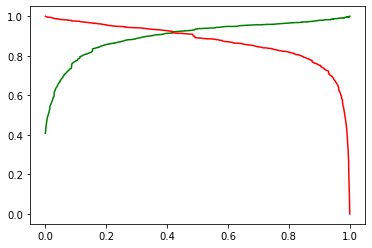

In [91]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 10: Making predictions on the test set

In [92]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [93]:
X_test = X_test[col]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2729 entries, 2762 to 7959
Data columns (total 60 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Do Not Email                                                           2729 non-null   int64  
 1   Total Time Spent on Website                                            2729 non-null   float64
 2   Search                                                                 2729 non-null   int64  
 3   Lead Origin_Landing Page Submission                                    2729 non-null   uint8  
 4   Lead Origin_Lead Add Form                                              2729 non-null   uint8  
 5   Lead Source_Facebook                                                   2729 non-null   uint8  
 6   Lead Source_NC_EDM                                                     2729 non-null 

In [94]:
# dropping variables where p>0.05
X = X_test.drop(['Last Notable Activity_Had a Phone Conversation',
    'Last Notable Activity_Email Link Clicked',
    'Lead Profile_Student of SomeSchool',
    'Lead Quality_Worst',
    'Lead Quality_High in Relevance',
    'Tags_wrong number given',
    'Tags_number not provided',
    'Tags_in touch with EINS',
    'Tags_Lost to Others',
    'Tags_Lateral student',
    'Tags_In confusion whether part time or DLP',
    'What is your current occupation_Working Professional',
                    'What is your current occupation_Housewife',
                    'How did you hear about X Education_Advertisements',
                    'Country_unknown','Country_South Africa','Country_Qatar','Country_France',
                    'Last Activity_Converted to Lead','Lead Source_NC_EDM','Lead Source_Reference',
                    'Lead Source_Facebook','Search','Lead Origin_Lead Add Form','Tags_Diploma holder (Not Eligible)','Tags_wrong number given',
                'Tags_Still Thinking','Tags_Want to take admission but has financial problems','Lead Profile_Other Leads'],axis=1)

Making predictions on the test set

In [95]:
X_test_sm = sm.add_constant(X)

In [96]:
X_test_sm.shape

(2729, 33)

In [97]:
y_test_pred = res.predict(X_test_sm)

In [98]:
y_test_pred[:10]

2762    0.997650
4049    0.992807
8661    0.002644
1197    0.048637
8214    0.150864
5149    0.023649
9048    0.360773
5303    0.004087
7689    0.992164
7722    0.725309
dtype: float64

In [99]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [100]:
# Let's see the head
y_pred_1.head()

,0
2762,0.997650
4049,0.992807
8661,0.002644
1197,0.048637
8214,0.150864


In [101]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [102]:
y_test_df

,Converted
2762,1
4049,1
8661,0
1197,0
8214,0
...,...
315,0
4444,1
9233,1
5824,1


In [103]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index
y_test_df.head()

,Converted,ID
2762,1,2762
4049,1,4049
8661,0,8661
1197,0,1197
8214,0,8214


In [104]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [105]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,ID,0
0,1,2762,0.997650
1,1,4049,0.992807
2,0,8661,0.002644
3,0,1197,0.048637
4,0,8214,0.150864


In [106]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,ID,Converted_Prob
0,1,2762,0.997650
1,1,4049,0.992807
2,0,8661,0.002644
3,0,1197,0.048637
4,0,8214,0.150864


In [107]:
# Rearranging the columns
y_pred_final = y_pred_final[['ID','Converted','Converted_Prob']]
y_pred_final.head()

,ID,Converted,Converted_Prob
0,2762,1,0.997650
1,4049,1,0.992807
2,8661,0,0.002644
3,1197,0,0.048637
4,8214,0,0.150864


In [108]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [109]:
y_pred_final.head()

,ID,Converted,Converted_Prob,final_predicted
0,2762,1,0.997650,1
1,4049,1,0.992807,1
2,8661,0,0.002644,0
3,1197,0,0.048637,0
4,8214,0,0.150864,0


In [110]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9333089043605717

In [111]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1598,  112],
       [  70,  949]], dtype=int64)

In [112]:
TP3 = confusion3[1,1] # true positive 
TN3 = confusion3[0,0] # true negatives
FP3 = confusion3[0,1] # false positives
FN3 = confusion3[1,0] # false negatives

In [113]:
# Let's check the overall accuracy.
float(TP3 + TN3)/ float(TP3+TN3+FP3+FN3)

0.9333089043605717

In [114]:
# Let's see the sensitivity of our logistic regression model
TP3 / float(TP3+FN3)

0.9313052011776252

In [115]:
# Let us calculate specificity
TN3 / float(TN3+FP3)

0.9345029239766082

## Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 
Accuracy : 93.5%
Sensitivity : 93.4%
Specificity : 93.6%


Test Data: 
Accuracy : 93.3%
Sensitivity : 93.1%
Specificity : 93.45%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

#### Calculating AUC Score for test data

In [116]:
from sklearn.metrics import roc_curve
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_final['final_predicted'], pos_label=1)

In [117]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [118]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score2 = roc_auc_score(y_test, y_pred_final['final_predicted'])
auc_score2

0.9329040625771167

### Lead Score: would be equivalent to the probability that customer will get converted

In [119]:
#rename Converted_Prob to Lead Score
Ls_df=y_pred_final
Ls_df= Ls_df.rename(columns={'Converted_Prob':'Lead Score'})
Ls_df.head()

,ID,Converted,Lead Score,final_predicted
0,2762,1,0.997650,1
1,4049,1,0.992807,1
2,8661,0,0.002644,0
3,1197,0,0.048637,0
4,8214,0,0.150864,0


### Identifying Hot Leads: cases where chances of conversion is super high

In [120]:
# this would be equivalent to cases where predicted cases (a.k.a 'final_predicted') =1
Ls_df[Ls_df['final_predicted']==1].head()

,ID,Converted,Lead Score,final_predicted
0,2762,1,0.997650,1
1,4049,1,0.992807,1
6,9048,1,0.360773,1
8,7689,1,0.992164,1
9,7722,1,0.725309,1
